In [ ]:
source("L:/Duncan/kptumors_figures/functions.R")

In [ ]:
library(arrow)

In [3]:
name = 'FlankCBT'
metadata = read.csv(paste0(name, "_meta.txt"), row.names = 1, 
        stringsAsFactors = FALSE)


In [4]:

rawfile = 'cellsAll.feather'
    rawdata = read_feather(rawfile) %>% as.data.frame()
    rownames(rawdata) = rawdata$Gene
    id = which(colnames(rawdata) == "Gene")
    rawdata = rawdata[, -id]
    rawdata = rawdata[, colnames(rawdata) %in% rownames(metadata)]
  

In [7]:
seurat = CreateSeuratObject(rawdata)

In [12]:
seurat@meta.data = metadata[seurat@cell.names,]

In [13]:
seurat = pyProcess(seurat)


Regressing out: n_genes




Time Elapsed:  1.76437873442968 mins

Scaling data matrix

Warning message:
"Python 'C:\Users\dmorgan\AppData\Local\Continuum\anaconda3\envs\seqwell\python.exe' was requested but 'C:/Users/dmorgan/AppData/Local/r-miniconda/envs/r-reticulate/python.exe' was loaded instead (see reticulate::py_config() for more information)"


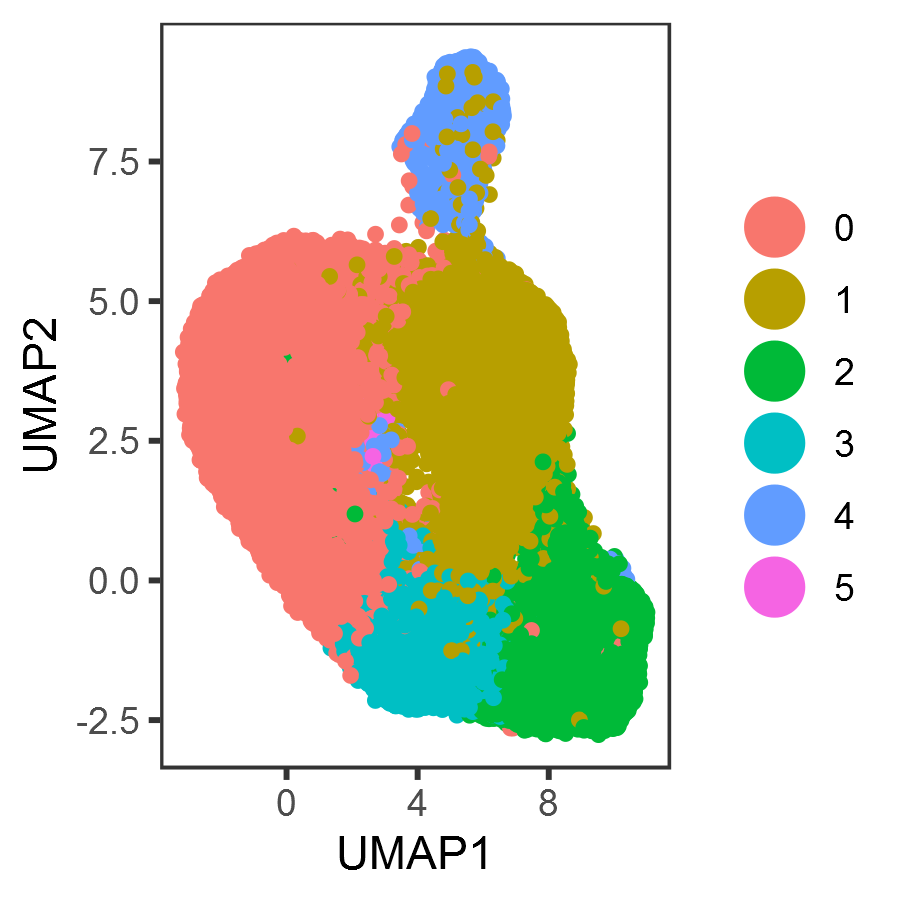

In [14]:
seurat = FindClusters(seurat, dims.use = 1:20, print.output = FALSE, resolution = .2, force.recalc = TRUE)
options(repr.plot.res=  300, repr.plot.width = 3, repr.plot.height = 3)
DimPlot(seurat, 'umap')

In [15]:
seurat

An object of class seurat in project SeuratProject 
 17220 genes across 41020 samples.

In [18]:
seurat = MakeSparse(seurat)
saveRDS(seurat, 'initialSeurat.RDS')

In [17]:
table(seurat@meta.data$orig)


  C1   C4   C7   C8   P1   P2   P3   P4   P5   P6 
 305 1162 2953  771 2433 4550 7109 7608 6554 7575 